In [1]:
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt
import IPython.display as display

In [2]:
dirname = './data/'
dirname

'./data/'

In [360]:
samplerate = 44100

def dummy(x):
    return x
    
def complex_amplitude(x):
    return 2 * x / np.pi

def sine_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1, phase=0.0, amplitude_func=dummy, m=0.2, fm=0, am=0):     
    t = np.linspace(0, duration, samplerate * duration)
    return (1 + m * am) * amplitude_func(amplitude) * np.sin((2 * np.pi * frequency * t  + phase) * (1 + fm))

def triangular_wave(samplerate=samplerate, duration=1,frequency=440.0, amplitude=1, phase=0.0, amplitude_func=complex_amplitude, m=0.2, fm=0, am=0):     
    t = np.linspace(0, duration, samplerate * duration)
    return (1+ m * am) * amplitude_func(amplitude) * np.arcsin(np.sin( (2 * np.pi * frequency * t + phase) * (1 + fm) ) )

def sawtooth_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1, phase=0.0, amplitude_func=complex_amplitude, m=0.2, fm=0, am=0):
    t = np.linspace(0, duration, samplerate * duration)
    return (1+ m * am) * amplitude_func(amplitude) * np.arctan(np.tan( (2 * np.pi * frequency * t + phase) * (1 + fm) ))

def pulse_wave(samplerate=samplerate, duration=1, duty=0.5, frequency=440.0, amplitude=1, phase=0.0,amplitude_func=dummy, m=0.2, fm=0, am=0):
    t = np.linspace(0, duration, samplerate * duration)
    values = (((t - phase) * (1 + fm)) % (1/frequency)) < (duty / frequency)
    return (1+ m * am) * amplitude_func(amplitude) * values.astype(float)

def noise(samplerate=samplerate, N = 1, amplitude = 1):
    return amplitude * np.random.random(samplerate * N)

from inspect import signature
def poly_wave(values, samplerate=samplerate, duration=1):
    poly = np.zeros(samplerate * duration)
    for i in range(len(values)):
        poly = np.sum([poly, values[i]],axis=0)
    return poly, len(params)


In [318]:
def to_wavefile(filename, gen_wave, k=1, sampwidth=4, framerate=samplerate, nchannels=1):
    samples = to_data(gen_wave, sampwidth,k)
    w = wave.open(dirname + filename, 'w')
    w.setparams((nchannels, sampwidth, framerate, int(np.ceil(len(samples) / framerate)), 'NONE', 'not compressed'))
    
    w.writeframes(samples)
    w.close()

In [319]:
def to_data(wave, sampwidth, k=1):
    type_dict = {1: 'b', 2:'h', 4:'l', 8:'q'}
    volume = 2 ** (8*sampwidth-1) - 1
    data = bytearray()
    for value in wave:
        data += bytearray(struct.pack(f"<{type_dict[sampwidth]}", int(value * volume / k)))
    return data

## Sine

In [320]:
sin = sine_wave()

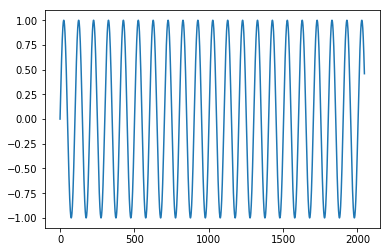

In [321]:
plt.plot(np.arange(0,2048), sin[:2048])

In [322]:
to_wavefile("sin.wav",sin)

In [323]:
display.Audio(url=dirname + 'sin.wav')

## Triangular

In [195]:
triangular = triangular_wave()

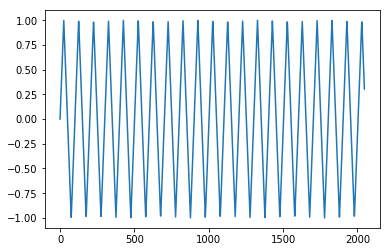

In [196]:
plt.plot(np.arange(0,2048), triangular[:2048])

In [197]:
to_wavefile("triangular.wav",triangular)

In [198]:
display.Audio(url=dirname + 'triangular.wav')

## Pulse

In [253]:
pulse = pulse_wave(duty=0.25)
pulse

array([1., 1., 1., ..., 0., 0., 1.])

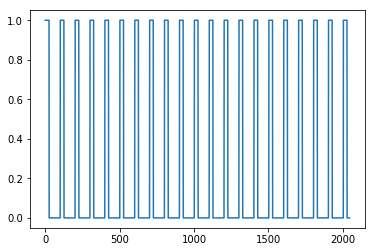

In [254]:
plt.plot(np.arange(0,2048), pulse[:2048])

In [255]:
to_wavefile("pulse.wav",pulse)

In [256]:
display.Audio(url=dirname + 'pulse.wav')

## Sawtooth

In [257]:
sawtooth = sawtooth_wave()

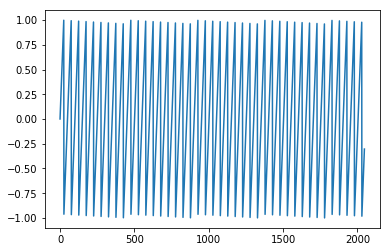

In [258]:
plt.plot(np.arange(0,2048), sawtooth[:2048])

In [259]:
to_wavefile("sawtooth.wav",sawtooth)

In [260]:
display.Audio(url=dirname + 'sawtooth.wav')

## Noise

In [261]:
noise_data = noise()

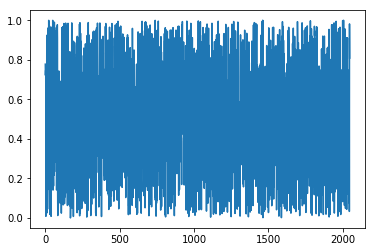

In [262]:
plt.plot(np.arange(0,2048), noise_data[:2048])

In [263]:
to_wavefile("noise.wav",noise_data)

In [264]:
display.Audio(url=dirname + 'noise.wav')

## Polyharmonic

In [327]:
params = [
    sine_wave(frequency=220,amplitude=1, phase=np.pi),
    sine_wave(frequency=300,amplitude=1, phase=2*np.pi),
    sine_wave(frequency=440,amplitude=1, phase=np.pi)
]
poly_sin, k = poly_wave(params)


In [328]:
poly_sin

array([ 0.00000000e+00, -5.12592976e-02, -1.02319722e-01, ...,
        1.02319722e-01,  5.12592976e-02, -1.96042525e-13])

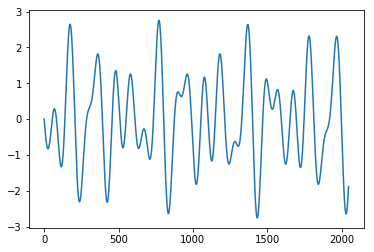

In [329]:
plt.plot(np.arange(0,2048), poly_sin[:2048])

In [330]:
to_wavefile("poly.wav",poly_sin,k)

In [331]:
display.Audio(url=dirname + 'poly.wav')

## Modulation

### AM

In [340]:
am = sine_wave(frequency=1, amplitude_func=lambda x: 1,duration=5)
am_sine = sine_wave(frequency=440, am=am, m=1,duration=5)


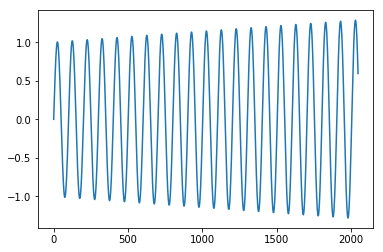

In [341]:
plt.plot(np.arange(0,2048), am_sine[:2048])

In [342]:
to_wavefile("am_sin.wav",am_sine, k=2)

In [343]:
display.Audio(url=dirname + 'am_sin.wav')

### FM


In [366]:
fm = pulse_wave(amplitude=0.5,frequency=600,duration=5)
fm

array([0.5, 0.5, 0.5, ..., 0. , 0. , 0. ])

In [367]:
fm_sine = sine_wave(frequency=2, fm=fm,duration=5)

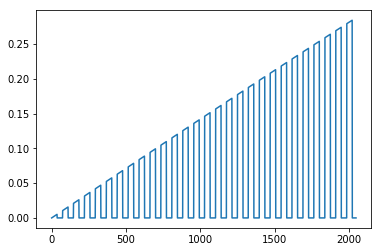

In [368]:
plt.plot(np.arange(0,2048), fm_sine[:2048])

In [369]:
to_wavefile("fm_sine.wav",fm_sine)

In [365]:
display.Audio(url=dirname + 'fm_sine.wav')